In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#librerias 
import numpy as np 
import matplotlib.pyplot as plt


In [0]:

# defino una función para hacer la integración de f (x) por cierto. a y b:
## metodo del trapecio
def trap(f, N, a, b,args):
    h = (b-a)/ float(N)
    intgr = 0.5 * h * (f(a,args) + f(b,args))
    for i in range(1, int(N)):
        intgr = intgr + h * f(i * h,args)
    return intgr

## metodo de simpsom
def simps(f, N, a, b, args):
    if N % 2 == 1:
        raise ValueError("N must be an even integer.")
    dx = (b-a)/N
    x = np.linspace(a,b,N+1)
    y = f(x,args)
    S = dx/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return S
# defino la funcion de Ex campo electrico en x
def func_Ex(x,args):
    y0,L,lambda_,epsilon0 = args # variables de la formula que son constantes 
    constante = lambda_/(4*np.pi*epsilon0) # la constante de fuera de la integral
    return constante*x/(y0**2+x**2)**(3/2) #hacemos la integral para el eje x

# defino la funcion de Ex campo electrico en x
def func_Ey(x,args):
    y0,L,lambda_,epsilon0 = args # variables de la formula que son constantes 
    constante = lambda_/(4*np.pi*epsilon0) # la constante de fuera de la integral
    return constante*y0/(y0**2+x**2)**(3/2) #hacemos la integral para el eje y

In [0]:
# L -> longitud de la barra, epsilon0 permitividad electica en el vacio [C**2/(N*m**2)]
L, q, epsilon0 = 1, 5, 8.8542e-12 # le damos valores a las variables 
lambda_ = q/L
N, a, b = 100, -L/2, L/2 #ponemos los limites de la integral

Lxi, Lxf, Lyi, Lyf  = -1, 1, -1, 1 #le agregamos valores a la barra
N0 = 50 
x_0 = np.linspace(Lxi, Lxf,N0) #Devuelve números espaciados uniformemente en un intervalo especificado.
y_0 = np.linspace(Lyi, Lyf,N0)
x0, y0 = np.meshgrid(x_0,y_0) #devuelve una lista de matrices de coordenadas a partir de vectores de coordenadas.
Ex = np.zeros((len(y_0),len(x_0))) #Devuelve una nueva matriz de formas y tipos dados, con ceros.
ExT = np.zeros((len(y_0),len(x_0)))
EyT = np.zeros((len(y_0),len(x_0)))
Ey = np.zeros((len(y_0),len(x_0)))
E = np.zeros((len(y_0),len(x_0)))
ET = np.zeros((len(y_0),len(x_0)))

for ii in range(len(x0)): #bucle para
    for jj in range(len(y0)):
      
        # Valores numéricos
        a = x0[jj][ii]-L/2 #los limites
        b = x0[jj][ii]+L/2 #los limites
        Ex[jj][ii] = simps(func_Ex, N, a, b, args=(y0[jj][ii],L,lambda_,epsilon0))
        Ey[jj][ii] = simps(func_Ey, N, a, b, args=(y0[jj][ii],L,lambda_,epsilon0))
        E[jj][ii] = Ex[jj][ii]*Ex[jj][ii]+Ey[jj][ii]*Ey[jj][ii] 

        
        # Valores teóricos
        ExT[jj][ii] = -(lambda_/(4*np.pi*epsilon0))*(1/np.sqrt(b**2+y0[jj][ii]**2)-1/np.sqrt(a**2+y0[jj][ii]**2)) 
        EyT[jj][ii] = (lambda_/(4*np.pi*epsilon0))*(1/y0[jj][ii])*(b/np.sqrt(b**2+y0[jj][ii]**2)-a/np.sqrt(a**2+y0[jj][ii]**2))
        ET[jj][ii] = ExT[jj][ii]*ExT[jj][ii]+EyT[jj][ii]*EyT[jj][ii] 
        

Text(0.5, 0.98, 'comparada')

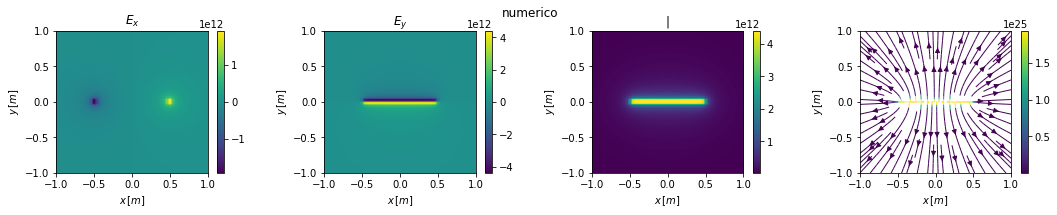

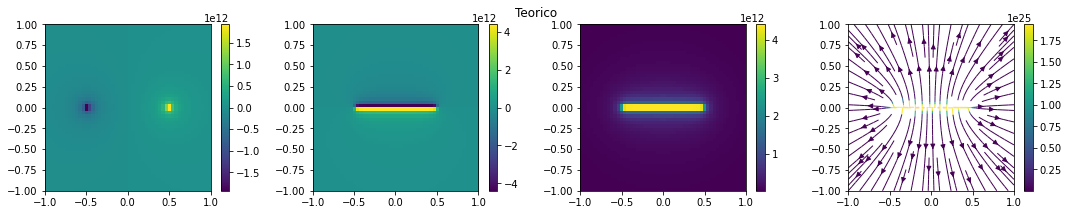

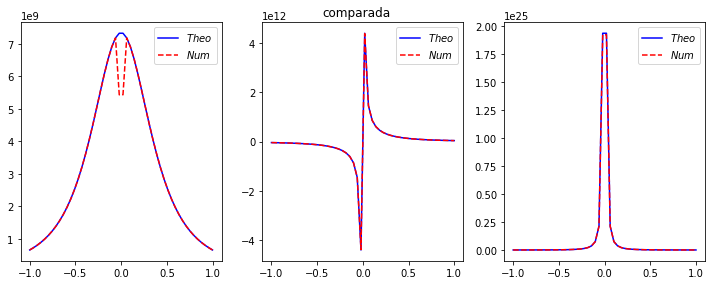

In [0]:
##  numerico
fig, axs = plt.subplots(1, 4, figsize=(15, 3)) #crea una figura y uno (o varios) conjunto de ejes con el tamaño de la figura
#fig.suptitle('Numerico')

# graficas del campo electrico en Ex

im0 = axs[0].imshow((Ex),extent=[Lxi, Lxf, Lyi, Lyf]) #procesa la grafica o la figura
fig.colorbar(im0,ax = axs[0]) #Agregua una barra de colores a un gráfico.
axs[0].set_title('$E_{x}$') #agrega titulo a la grafica
axs[0].set_xlabel('$x\,[m]$') #agrega nombre a los ejes
axs[0].set_ylabel('$y\,[m]$')
axs[0].set_aspect('auto') #Estableze el aspecto de la escala del eje, es decir, la relación entre la unidad y y la unidad x.
# axs[0] numero de grafica en este caso grafica 1

#graficas del campo electrico en Ey 
## numerico


im1 = axs[1].imshow((Ey),extent=[Lxi, Lxf, Lyi, Lyf])
fig.colorbar(im1,ax = axs[1])
axs[1].set_title('$E_{y}$')
axs[1].set_xlabel('$x\,[m]$')
axs[1].set_ylabel('$y\,[m]$')
axs[1].set_aspect('auto')
# axs[1] numero de grafica en este caso grafica 2

im2 = axs[2].imshow((np.sqrt(E)),extent=[Lxi, Lxf, Lyi, Lyf])
fig.colorbar(im2,ax = axs[2])
axs[2].set_title('$|\vec{E}|$')
axs[2].set_xlabel('$x\,[m]$')
axs[2].set_ylabel('$y\,[m]$')
axs[2].set_aspect('auto')
# axs[2] numero de grafica en este caso grafica 3

im3 = axs[3].streamplot(x0, y0, Ex, Ey,color=E, linewidth=1, cmap='viridis')
fig.colorbar(im3.lines)
axs[3].set_xlabel('$x\,[m]$')
axs[3].set_ylabel('$y\,[m]$')
axs[3].set_aspect('auto')
# axs[3] numero de grafica en este caso grafica 4

plt.tight_layout() #para separar las graficas 
fig.suptitle('numerico') #titulos para todas las graficas

## Teorico
fig, axs = plt.subplots(1, 4, figsize=(15, 3))       
im0 = axs[0].imshow((ExT),extent=[Lxi, Lxf, Lyi, Lyf])
fig.colorbar(im0,ax = axs[0]) #colocamos color a la figura
axs[0].set_aspect('auto')  
im1 = axs[1].imshow((EyT),extent=[Lxi, Lxf, Lyi, Lyf])
fig.colorbar(im1,ax = axs[1])
axs[1].set_aspect('auto')  
im2 = axs[2].imshow((np.sqrt(ET)),extent=[Lxi, Lxf, Lyi, Lyf])
fig.colorbar(im2,ax = axs[2])
axs[2].set_aspect('auto') 
im3 = axs[3].streamplot(x0, y0, ExT, EyT,color=ET, linewidth=1, cmap='viridis')
fig.colorbar(im3.lines)
axs[3].set_aspect('auto')

plt.tight_layout()
fig.suptitle('Teorico')

## comparamos el comportamiento con una grafica

fig, axs = plt.subplots(1, 3, figsize=(10, 4)) 
f_ = int(len(y_0)/2)
axs[0].plot(y0[:,f_],ExT[:,f_],'b') #graficamos con respecto a campo electrico total en eje x
axs[0].plot(y0[:,f_],Ex[:,f_],'--r')
axs[0].legend(('$Theo$', '$Num$'))

axs[1].plot(y0[:,f_],EyT[:,f_],'b') #graficamos con respecto a campo electrico total en eje y
axs[1].plot(y0[:,f_],Ey[:,f_],'--r')
axs[1].legend(('$Theo$', '$Num$'))

axs[2].plot(y0[:,f_],ET[:,f_],'b') #graficamos con respecto a campo electrico
axs[2].plot(y0[:,f_],E[:,f_],'--r')
axs[2].legend(('$Theo$', '$Num$'))

plt.tight_layout()
fig.suptitle('comparada')
